In [1]:
!pip install requests

You should consider upgrading via the 'c:\users\ted kumagai\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


# Food Saftey Data EDA Project

The purpose of this project was to familiarize myself with data importing, cleaning and exploratory data analysis with San Francisco area resturant data. 


In [2]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
import sys

assert 'zipfile'in sys.modules
assert 'pandas'in sys.modules and pd
assert 'numpy'in sys.modules and np
assert 'matplotlib'in sys.modules and plt
assert 'seaborn'in sys.modules and sns

In [4]:
import ds100_utils
source_data_url = 'http://www.ds100.org/fa18/assets/datasets/hw2-SFBusinesses.zip'
target_file_name = 'data.zip'
data_dir = '.'

# Change the force=False -> force=True in case you need to force redownload the data
dest_path = ds100_utils.fetch_and_cache(data_url=source_data_url, data_dir=data_dir, file=target_file_name, force=False)

Using cached version that was downloaded (UTC): Sun Aug  2 16:13:20 2020


In [5]:
my_zip = zipfile.ZipFile('data.zip', 'r')
list_names = ["businesses", "inspections", "legend", "violations"]

#printing file names and sizes
print([f.filename for f in my_zip.filelist])



['violations.csv', 'businesses.csv', 'inspections.csv', 'legend.csv']


In [6]:
from pathlib import Path
data_dir = Path('data')
my_zip.extractall(data_dir)

In [7]:
#Looking at the files
ds100_utils.head('data/businesses.csv', 5)
ds100_utils.head('data/inspections.csv',5)
ds100_utils.head('data/legend.csv', 5)
ds100_utils.head('data/violations.csv', 5)

['"business_id","date","description"\n',
 '19,"20171211","Inadequate food safety knowledge or lack of certified food safety manager"\n',
 '19,"20171211","Unapproved or unmaintained equipment or utensils"\n',
 '19,"20160513","Unapproved or unmaintained equipment or utensils  [ date violation corrected: 12/11/2017 ]"\n',
 '19,"20160513","Unclean or degraded floors walls or ceilings  [ date violation corrected: 12/11/2017 ]"\n']

## Reading in Files for Food Saftey Data


In [8]:
# path to directory containing data
dsDir = Path('data')

#defining variables for quick access to csv files.
bus =  pd.read_csv(Path('data/businesses.csv'), encoding='ISO-8859-1')
ins =  pd.read_csv(Path('data/inspections.csv'))
vio = pd.read_csv(Path('data/violations.csv'))


bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440


In [9]:
ins.head()

,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine
3,24,98,20161005,routine
4,24,96,20160311,routine


In [10]:
vio.head()

,business_id,date,description
0,19,20171211,Inadequate food safety knowledge or lack of ce...
1,19,20171211,Unapproved or unmaintained equipment or utensils
2,19,20160513,Unapproved or unmaintained equipment or utensi...
3,19,20160513,Unclean or degraded floors walls or ceilings ...
4,19,20160513,Food safety certificate or food handler card n...


In [11]:
#Summarizing files with the describe command
bus.describe()

,business_id,latitude,longitude
count,6406.000000,3270.000000,3270.000000
mean,53058.248049,37.773662,-122.425791
std,34928.238762,0.022910,0.027762
min,19.000000,37.668824,-122.510896
25%,7405.500000,37.760487,-122.436844
50%,68294.500000,37.780435,-122.418855
75%,83446.500000,37.789951,-122.406609
max,94574.000000,37.824494,-122.368257


In [12]:
ins.describe()

,business_id,score,date
count,14222.000000,14222.000000,1.422200e+04
mean,45138.752637,90.697370,2.016242e+07
std,34497.913056,8.088705,8.082778e+03
min,19.000000,48.000000,2.015013e+07
25%,5634.000000,86.000000,2.016021e+07
50%,61462.000000,92.000000,2.016091e+07
75%,78074.000000,96.000000,2.017061e+07
max,94231.000000,100.000000,2.018012e+07


In [13]:
vio.describe()

,business_id,date
count,39042.000000,3.904200e+04
mean,45674.440244,2.016283e+07
std,34172.433276,7.874679e+03
min,19.000000,2.015013e+07
25%,4959.000000,2.016031e+07
50%,62060.000000,2.016092e+07
75%,77681.000000,2.017063e+07
max,94231.000000,2.018012e+07


The buisnesses csv file does not have any dates

## Examining Buisness Data

In [14]:
#checking if each record is unique
x = bus.business_id.value_counts()

if (len(x) == len(bus.business_id.unique())) == True:
    is_business_id_unique = True

#if error, then false. But running the code yeilds no results, hence, True. 
assert is_business_id_unique

In [15]:
#1. 6406 entries in this record.  
print(x)

2047     1
71088    1
5528     1
89497    1
16513    1
        ..
81342    1
21143    1
64154    1
2716     1
83969    1
Name: business_id, Length: 6406, dtype: int64


In [16]:
#2. Each record represents, from left to right: the business_id, name of store, physical address, city, 
#   state, postal code, and latitude and logitude coordinates.

bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440


In [17]:
#3. Primary key is the 'business_id'. It sets a unique identifier for all businesses,
#   avoiding duplicate names, postal codes, and serves as a unique data tag. 
bus.keys()

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'phone_number'],
      dtype='object')

## Examining Zipcode Data


In [18]:
print(bus.postal_code.get_dtype_counts())

object    1
dtype: int64


c:\users\ted kumagai\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  """Entry point for launching an IPython kernel.


In [19]:
bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440


In [20]:
pd.Series('bus')

0    bus
dtype: object

Here, looking at zip count data, if there are any NaN values, they will be filled by '?????''


In [21]:
zip_counts = (bus.fillna("?????")
                 .groupby('postal_code')
                 .size()
                 .sort_values(ascending=False)
             )

zip_counts

postal_code
94110        596
94103        552
94102        462
94107        460
94133        426
94109        380
94111        277
94122        273
94118        249
94115        243
?????        240
94105        232
94108        228
94114        223
94117        204
94112        195
94124        191
94123        173
94121        160
94104        139
94132        133
94116         99
94134         77
94127         71
94131         49
94158         32
94130          7
94143          5
94188          4
94101          2
94014          2
94013          2
00000          2
CA             2
94129          2
941102019      1
94120          1
941033148      1
94544          1
94545          1
94602          1
941            1
94080          1
94066          1
94621          1
95105          1
92672          1
64110          1
Ca             1
dtype: int64

In [22]:
#There are zip codes beyond 5 digits. So I drop any zip code with digits beyond 5.

bus['postal_code_5'] = bus['postal_code'].str[:5]
bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94109
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,94104
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN,94133
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051,94110
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440,94122


In [23]:
#This does not explain the ????? zip codes. So lets take a look.

x = bus[bus["postal_code_5"].isnull()]
x

print('Many of the NaN resturants are chain resturants or food trucks without a local area code.')

Many of the NaN resturants are chain resturants or food trucks without a local area code.


In [24]:
#lets see if any of the zip codes do not match SF area zip codes

all_sf_zip_codes = ["94102", "94103", "94104", "94105", "94107", "94108"
                    , "94109", "94110", "94111", "94112", "94114", "94115"
                    , "94116", "94117", "94118", "94119", "94120", "94121"
                    , "94122", "94123", "94124", "94125", "94126", "94127"
                    , "94128", "94129", "94130", "94131", "94132", "94133"
                    , "94134", "94137", "94139", "94140", "94141", "94142"
                    , "94143", "94144", "94145", "94146", "94147", "94151"
                    , "94158", "94159", "94160", "94161", "94163", "94164"
                    , "94172", "94177", "94188"]

weird_zip_code_businesses = bus.loc[(pd.notnull(bus.loc[:, 'postal_code_5'])) 
                                    & (~bus.postal_code_5.isin(all_sf_zip_codes))]

weird_zip_code_businesses.head()
bus['postal_code_5'] = bus['postal_code'].str.replace('94602', '94102')

text = r"""

Looking into these strange buisnesses with weird zip codes,  
buisnesses without zip codes seem to be non standard food vendors. 

For example:    
94545 - Hayward. B/c VARIOUS LOACATIONS (17). It is a vending machine service. So maybe the machine is in Sanfransico, but everything
operates out of Hayward. 

94609 - Oakland: The Orbit Room. There is a returant called Esther's Orbit room that was once operational in Oakland. 
Perhaps, the owners moved, or there is confusion with the two names and has been improperly entered. Or just has been oversight in general.
"""

print(text)



Looking into these strange buisnesses with weird zip codes,  
buisnesses without zip codes seem to be non standard food vendors. 

For example:    
94545 - Hayward. B/c VARIOUS LOACATIONS (17). It is a vending machine service. So maybe the machine is in Sanfransico, but everything
operates out of Hayward. 

94609 - Oakland: The Orbit Room. There is a returant called Esther's Orbit room that was once operational in Oakland. 
Perhaps, the owners moved, or there is confusion with the two names and has been improperly entered. Or just has been oversight in general.



## Latitude and Longitude Data

In [25]:
missing_latlongs = len(bus[bus['longitude'].isnull() == True])
missing_latlongs

3136

Here, in the interest of time, only densely populated SF zip code data will be examined.

In [26]:
sf_dense_zip = ["94102", "94103", "94104", "94105", "94107", "94108",
            "94109", "94110", "94111", "94112", "94114", "94115",
            "94116", "94117", "94118", "94121", "94122", "94123", 
            "94124", "94127", "94131", "94132", "94133", "94134"]

bus_sf = bus[bus['postal_code_5'].isin(sf_dense_zip)]
bus_sf_1 = bus_sf[bus_sf['longitude'].isnull()]


num_missing_in_each_zip = bus_sf_1.groupby('postal_code_5').size().sort_values(ascending=False)

num_missing_in_each_zip 


postal_code_5
94110    294
94103    284
94107    275
94102    222
94109    171
94133    159
94122    132
94111    129
94105    127
94124    118
94118    117
94114    111
94108     98
94115     95
94117     86
94104     79
94112     77
94132     71
94123     68
94121     60
94116     42
94134     36
94127     30
94131     16
dtype: int64

In [27]:
#looking at null values
bus_sf = bus[bus['postal_code_5'].isin(sf_dense_zip)]

bus_sf_1 = bus_sf[bus_sf['longitude'].isnull()]
num_missing_in_each_zip = bus_sf_1.groupby('postal_code_5').size()

bus_sf_2 = bus_sf[~bus_sf['longitude'].isnull()]
not_null_count_zip = bus_sf_2.groupby('postal_code_5').size().sort_values(ascending = False)

x = pd.concat(
[num_missing_in_each_zip, not_null_count_zip], axis = 1
).rename(index=str, columns={0: "null count", 1: "not null count"})
x

x['fraction null'] = (x['null count'])/(x['null count'] + x['not null count'])
x

c:\users\ted kumagai\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


,null count,not null count,fraction null
94102,222,241,0.479482
94103,284,268,0.514493
94104,79,60,0.568345
94105,127,105,0.547414
94107,275,185,0.597826
94108,98,130,0.429825
94109,171,209,0.450000
94110,294,302,0.493289
94111,129,148,0.465704
94112,77,118,0.394872


# Business Data Summary

- Found that business id is unique across records, so there is potential for joins.
- Errors in the zip codes. May want to drop the records with zip codes beyond SF or treat them separately. 
- Lots of missing longitude and latitude values. 

# Inspection Data

In [28]:
ins.head()

,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine
3,24,98,20161005,routine
4,24,96,20160311,routine


In [29]:
# The number of rows in ins
rows_in_table = ins.shape[0]
rows_in_table

#rows_in_table = ins
# The number of unique business IDs in ins.
unique_ins_ids = ins['business_id'].unique().shape[0]

In [30]:
rows_in_table

14222

In [31]:
unique_ins_ids

5766

Now need to figure out the years the data spans. The dates in the file are formatted in strings, hence they must  be modified into an appropriate format. 

In [32]:
ins['new_date'] = pd.to_datetime(ins['date'])
ins['new_date'] = pd.to_datetime(ins['date'], format='%Y%m%d')
ins['year'] = ins['new_date'].dt.year

ins.head()

,business_id,score,date,type,new_date,year
0,19,94,20160513,routine,2016-05-13,2016
1,19,94,20171211,routine,2017-12-11,2017
2,24,98,20171101,routine,2017-11-01,2017
3,24,98,20161005,routine,2016-10-05,2016
4,24,96,20160311,routine,2016-03-11,2016


In [33]:
ins.max()

business_id                  94231
score                          100
date                      20180125
type                       routine
new_date       2018-01-25 00:00:00
year                          2018
dtype: object

In [34]:
ins.min()

business_id                     19
score                           48
date                      20150126
type                     complaint
new_date       2015-01-26 00:00:00
year                          2015
dtype: object

3 year span.

# Inspection Score Data

Since the insepction scores are integer values, the scores can be charted on a barchart. 

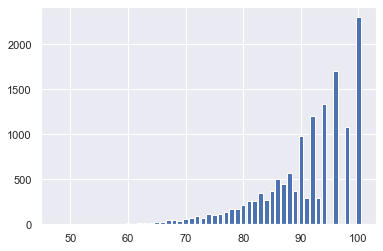

Nothing is belwow 50 percent or so. There is a spike of 100 scores. and also there are gaps between 90 and 100 percent. 


In [35]:
scoreCts = ins['score'].value_counts(ascending=False)
plt.bar(scoreCts.keys(), scoreCts)

plt.show()

print("Nothing is belwow 50 percent or so. There is a spike of 100 scores. and also there are gaps between 90 and 100 percent. ")

# Worst Scored Resturants

In [36]:
x = bus.copy()
x = x[['business_id','name', 'address']]
ins_named = pd.merge(ins, x, how = 'left', on= "business_id")

ins_named.describe()

,business_id,score,date,year
count,14222.000000,14222.000000,1.422200e+04,14222.000000
mean,45138.752637,90.697370,2.016242e+07,2016.174167
std,34497.913056,8.088705,8.082778e+03,0.807443
min,19.000000,48.000000,2.015013e+07,2015.000000
25%,5634.000000,86.000000,2.016021e+07,2016.000000
50%,61462.000000,92.000000,2.016091e+07,2016.000000
75%,78074.000000,96.000000,2.017061e+07,2017.000000
max,94231.000000,100.000000,2.018012e+07,2018.000000


In [37]:
def swing(series):
    swing = series.max()-series.min()
    return swing

s_frame = ins_named['score'].groupby(ins_named['business_id']).agg(swing).to_frame()

s_frame.describe()

,score
count,5766.000000
mean,5.636663
std,6.151905
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,39.000000


# Score Variance. 

Resturants have at least 2 inspections a year. Therefore, I made a scatter and histogram plot to visualize the data. 

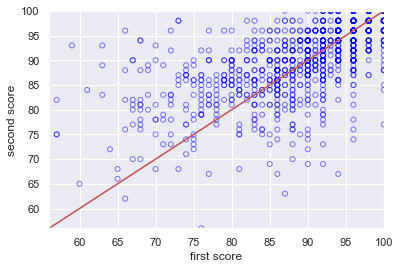

In [38]:
ins2016 = ins[ins['year'] == 2016]


def group_to_list(group):
    return list(group)
ins2016 = ins2016.sort_values('new_date').groupby('business_id').filter(lambda x: x ['year'].sum() == 4032).groupby('business_id')[['score']].agg(group_to_list).rename(index = str, columns = {'score': 'score_pair'})

scores_pairs_by_business = ins2016

first_score = scores_pairs_by_business['score_pair'].map(lambda x: x[0])
second_score = scores_pairs_by_business['score_pair'].map(lambda x: x[1])

plt.scatter(first_score, second_score, alpha = 0.5, facecolors = 'none', edgecolors = 'blue', s=25)


plt.xlim(xmin = 56, xmax = 100)
plt.ylim(ymin = 56, ymax = 100)
plt.plot([55,100], [55,100], color = 'r')

plt.xlabel('first score')
plt.ylabel('second score')
plt.show()

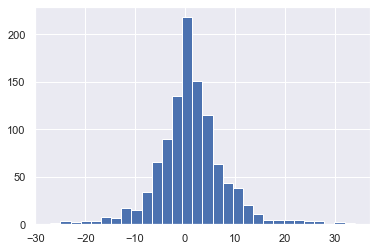

In [39]:
plt.hist(second_score - first_score, bins=30)
plt.show()

## Summary of the Inspections Data

- By joining the business and inspection data, we identified the name of the restaurant with the worst rating and optionally the names of the restaurants with the best rating.

- Examined the relationship between the scores when a restaurant has    multipleinspections in a year. 